### need to be solved:
#### Is there a problem with the delivery service
#### Whether there are still potential sales areas
#### Whether the product has quality problems

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' #set chinese display

In [19]:
data = pd.read_csv('data_wuliu.csv',encoding = 'gbk')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品      1161 non-null   object 
 6   货品用户反馈  1161 non-null   object 
 7   销售区域    1161 non-null   object 
 8   数量      1157 non-null   float64
 9   销售金额    1161 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB


In [23]:
# Data format adjustment
# delete duplicate records
data.drop_duplicates(keep='first',inplace = True)
data.info()
# remove missing values
data.dropna(axis = 0,how = 'any',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1150 non-null   object 
 1   订单行     1152 non-null   int64  
 2   销售时间    1152 non-null   object 
 3   交货时间    1152 non-null   object 
 4   货品交货状况  1150 non-null   object 
 5   货品      1152 non-null   object 
 6   货品用户反馈  1152 non-null   object 
 7   销售区域    1152 non-null   object 
 8   数量      1150 non-null   float64
 9   销售金额    1152 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 99.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   订单行     1146 non-null   int64  
 2   销售时间    1146 non-null   object 
 3   交货时间    1146 non-null   object 
 4   货品交货状况  1146 non-null   object 
 5   货品      1146 no

In [24]:
data.drop(columns = ['订单行'],inplace = True,axis =1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   销售时间    1146 non-null   object 
 2   交货时间    1146 non-null   object 
 3   货品交货状况  1146 non-null   object 
 4   货品      1146 non-null   object 
 5   货品用户反馈  1146 non-null   object 
 6   销售区域    1146 non-null   object 
 7   数量      1146 non-null   float64
 8   销售金额    1146 non-null   object 
dtypes: float64(1), object(8)
memory usage: 89.5+ KB


In [26]:
# update index
data.reset_index(drop=True,inplace=True)

In [27]:
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,"1052,75元"
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,"6858,77元"
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,"129,58元"
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,"32,39元"
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,"200,41元"
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,"79,44元"
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,"194,08元"
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,"32,18元"


In [31]:
# Adjust sales amount column
def date_deal(number):
    if number.find('万元')!= -1:
        new_number = float(number[:number.find('万元')].replace(',',''))*10000
        pass
    else:
        new_number = float(number.replace('元','').replace(',',''))
        pass
    return new_number
data['销售金额'] = data['销售金额'].map(date_deal)
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


In [36]:
# Outlier Handling
data.describe()

,数量,销售金额
count,1146.000000,1.146000e+03
mean,76.069372,1.223488e+05
std,589.416486,1.114599e+06
min,1.000000,0.000000e+00
25%,1.000000,2.941500e+03
50%,1.000000,9.476500e+03
75%,4.000000,3.576775e+04
max,11500.000000,3.270000e+07


In [38]:
# Delete data with 0 sales amount
data = data[data['销售金额']!=0]
data.describe()

,数量,销售金额
count,1145.000000,1.145000e+03
mean,76.134934,1.224557e+05
std,589.669861,1.115081e+06
min,1.000000,5.100000e+01
25%,1.000000,2.946000e+03
50%,1.000000,9.486000e+03
75%,4.000000,3.577300e+04
max,11500.000000,3.270000e+07


In [43]:
data['销售时间'] = pd.to_datetime(data['销售时间'])
data['月份'] = data['销售时间'].apply(lambda x:x.month)
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,月份
0,P096311,2016-07-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0,8
2,P097435,2016-07-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0,7
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0,11
...,...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0,12
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0,12
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0,12
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0,12


#### Is there a problem with the delivery service

In [47]:
# month
data['货品交货状况'] = data['货品交货状况'].str.strip()
data1 = data.groupby(['月份','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货'] + data1['晚交货'])
data1

货品交货状况,按时交货,晚交货,按时交货率
月份,,,
7,189,13,0.935644
8,218,35,0.861660
9,122,9,0.931298
10,238,31,0.884758
11,101,25,0.801587
12,146,18,0.890244


In [49]:
# sales area
data1 = data.groupby(['销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货'] + data1['晚交货'])
data1.sort_values(by = '按时交货率',ascending= False)

货品交货状况,按时交货,晚交货,按时交货率
销售区域,,,
泰国,183,4,0.978610
马来西亚,310,16,0.950920
华南,10,1,0.909091
华北,226,27,0.893281
华东,268,39,0.872964
西北,17,44,0.278689


In [50]:
# goods
data1 = data.groupby(['货品','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货'] + data1['晚交货'])
data1.sort_values(by = '按时交货率',ascending= False)

货品交货状况,按时交货,晚交货,按时交货率
货品,,,
货品5,183,4,0.978610
货品6,309,7,0.977848
货品1,27,2,0.931034
货品3,212,26,0.890756
货品2,269,48,0.848580
货品4,14,44,0.241379


In [51]:
# goods & sales area
data1 = data.groupby(['货品','销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货'] + data1['晚交货'])
data1.sort_values(by = '按时交货率',ascending= False)

货品交货状况     按时交货   晚交货     按时交货率
货品  销售区域                       
货品5 泰国    183.0   4.0  0.978610
货品6 马来西亚  309.0   7.0  0.977848
货品1 华北     14.0   1.0  0.933333
    华南     10.0   1.0  0.909091
货品3 华北    212.0  26.0  0.890756
货品2 华东    268.0  39.0  0.872964
货品4 西北     14.0  44.0  0.241379
货品2 马来西亚    1.0   9.0  0.100000
货品1 西北      3.0   NaN       NaN

#### Whether there are still potential sales areas


<AxesSubplot:xlabel='月份'>

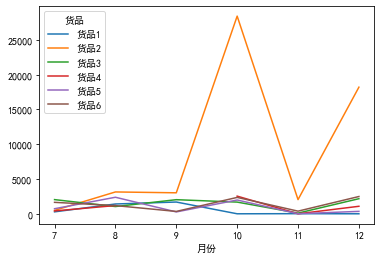

In [54]:
# month
data1 = data.groupby(['月份','货品'])['数量'].sum().unstack()
data1.plot(kind = 'line')

In [55]:
# areas
data1 = data.groupby(['销售区域','货品'])['数量'].sum().unstack()
data1

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,NaN,53811.0,NaN,NaN,NaN,NaN
华北,2827.0,NaN,9073.5,NaN,NaN,NaN
华南,579.0,NaN,NaN,NaN,NaN,NaN
泰国,NaN,NaN,NaN,NaN,5733.0,NaN
西北,11.0,NaN,NaN,5229.0,NaN,NaN
马来西亚,NaN,1510.0,NaN,NaN,NaN,8401.0


In [57]:
# month & areas
data1 = data.groupby(['月份','销售区域','货品'])['数量'].sum()
data1

月份  销售区域  货品 
7   华东    货品2      489.0
    华北    货品1        1.0
          货品3     2041.5
    华南    货品1      282.0
    泰国    货品5      733.0
    西北    货品4      414.0
    马来西亚  货品2        2.0
          货品6     1649.0
8   华东    货品2     1640.0
    华北    货品1     1410.0
          货品3     1045.0
    华南    货品1        3.0
    泰国    货品5     2381.0
    西北    货品4     1188.0
    马来西亚  货品2     1503.0
          货品6     1181.0
9   华东    货品2     3019.0
    华北    货品1     1409.0
          货品3     2031.0
    华南    货品1      283.0
    泰国    货品5      271.0
    西北    货品1        1.0
    马来西亚  货品2        1.0
          货品6      343.0
10  华东    货品2    28420.0
    华北    货品1        3.0
          货品3     1684.0
    泰国    货品5     1984.0
    西北    货品1        1.0
          货品4     2542.0
    马来西亚  货品6     2358.0
11  华东    货品2     2041.0
    华北    货品1        2.0
          货品3      100.0
    华南    货品1        9.0
    泰国    货品5       14.0
    西北    货品1        9.0
          货品4        3.0
    马来西亚  货品2        1.0
          货

#### Whether the product has quality problems

In [60]:
data['货品用户反馈'] = data['货品用户反馈'].str.strip()
data1 = data.groupby(['货品','销售区域'])['货品用户反馈'].value_counts().unstack()
data1

货品用户反馈      拒货   质量合格    返修
货品  销售区域                   
货品1 华北     NaN    3.0  12.0
    华南     5.0    4.0   2.0
    西北     NaN    1.0   2.0
货品2 华东    72.0  184.0  51.0
    马来西亚   6.0    1.0   3.0
货品3 华北    31.0  188.0  19.0
货品4 西北     NaN    9.0  49.0
货品5 泰国    14.0  144.0  29.0
货品6 马来西亚  56.0  246.0  14.0

In [68]:
data1['拒货率'] = data1['拒货']/data1.sum(axis = 1)
data1['返修率'] = data1['返修']/data1.sum(axis = 1)
data1['合格率'] = data1['质量合格']/data1.sum(axis = 1)
data1.sort_values(['合格率','返修率','拒货率'],ascending=False)

货品用户反馈      拒货   质量合格    返修       拒货率       返修率       合格率
货品  销售区域                                                 
货品3 华北    31.0  188.0  19.0  0.129709  0.079499  0.786625
货品6 马来西亚  56.0  246.0  14.0  0.176658  0.044164  0.776033
货品5 泰国    14.0  144.0  29.0  0.074470  0.154260  0.765979
货品2 华东    72.0  184.0  51.0  0.233769  0.165586  0.597409
货品1 华南     5.0    4.0   2.0  0.419369  0.167748  0.335497
    西北     NaN    1.0   2.0       NaN  0.527187  0.263803
    华北     NaN    3.0  12.0       NaN  0.752772  0.188194
货品4 西北     NaN    9.0  49.0       NaN  0.830743  0.152585
货品2 马来西亚   6.0    1.0   3.0  0.549644  0.274824  0.091608

### Conclusion:
#### 1.Goods 4->Northwest, Goods 2->Malaysia have big problems and urgently need to improve the timeliness
#### 2.There is still a large market space for product 2 in East China, which is suitable for increasing investment. At the same time, the delivery time of product 2 in the northwest is long, and the user rejection rate is high. From the perspective of cost, investment should be reduced
#### 3.There are problems with the quality of goods 1, 2, and 4. It is recommended to expand the scope of sampling inspection and increase the intensity of quality inspection